In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
cv2.imshow('frame', X_train[np.random.randint(0, 59999)])
cv2.waitKey(0)
cv2.destroyAllWindows()

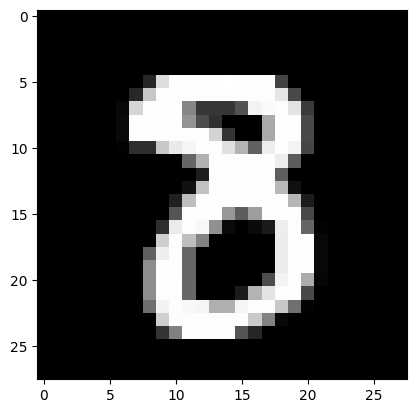

In [6]:
plt.imshow(X_train[np.random.randint(0, 59999)], cmap='gray')
plt.show()

### Forward Process

In [138]:
T = 200
IMG_SHAPE = (28, 28, 1)
betas = np.linspace(1e-4, 0.1, T, dtype=np.float32)

In [139]:
betas


array([9.99999975e-05, 6.02010055e-04, 1.10402005e-03, 1.60603016e-03,
       2.10804027e-03, 2.61005014e-03, 3.11206025e-03, 3.61407036e-03,
       4.11608024e-03, 4.61809058e-03, 5.12010045e-03, 5.62211033e-03,
       6.12412067e-03, 6.62613055e-03, 7.12814089e-03, 7.63015077e-03,
       8.13216064e-03, 8.63417052e-03, 9.13618132e-03, 9.63819120e-03,
       1.01402011e-02, 1.06422110e-02, 1.11442208e-02, 1.16462307e-02,
       1.21482415e-02, 1.26502514e-02, 1.31522613e-02, 1.36542711e-02,
       1.41562810e-02, 1.46582918e-02, 1.51603017e-02, 1.56623106e-02,
       1.61643215e-02, 1.66663323e-02, 1.71683412e-02, 1.76703520e-02,
       1.81723610e-02, 1.86743718e-02, 1.91763826e-02, 1.96783915e-02,
       2.01804023e-02, 2.06824113e-02, 2.11844221e-02, 2.16864329e-02,
       2.21884418e-02, 2.26904526e-02, 2.31924616e-02, 2.36944724e-02,
       2.41964832e-02, 2.46984921e-02, 2.52005029e-02, 2.57025119e-02,
       2.62045227e-02, 2.67065335e-02, 2.72085425e-02, 2.77105533e-02,
      

In [140]:
alphas = 1 - betas
alphas

array([0.9999    , 0.999398  , 0.998896  , 0.99839395, 0.99789196,
       0.99739   , 0.9968879 , 0.99638593, 0.99588394, 0.9953819 ,
       0.9948799 , 0.9943779 , 0.99387586, 0.9933739 , 0.9928719 ,
       0.99236983, 0.99186784, 0.99136585, 0.9908638 , 0.9903618 ,
       0.9898598 , 0.98935777, 0.9888558 , 0.9883538 , 0.98785174,
       0.98734975, 0.98684776, 0.9863457 , 0.9858437 , 0.9853417 ,
       0.9848397 , 0.9843377 , 0.9838357 , 0.98333365, 0.98283166,
       0.98232967, 0.9818276 , 0.9813256 , 0.98082364, 0.9803216 ,
       0.9798196 , 0.9793176 , 0.97881556, 0.97831357, 0.9778116 ,
       0.9773095 , 0.97680753, 0.97630554, 0.9758035 , 0.9753015 ,
       0.9747995 , 0.97429746, 0.9737955 , 0.9732935 , 0.97279143,
       0.97228944, 0.97178745, 0.9712854 , 0.9707834 , 0.9702814 ,
       0.9697794 , 0.9692774 , 0.9687754 , 0.96827334, 0.96777135,
       0.96726936, 0.9667673 , 0.9662653 , 0.96576333, 0.9652613 ,
       0.9647593 , 0.9642573 , 0.96375525, 0.96325326, 0.96275

In [141]:
alpha_cumprod = np.cumprod(alphas)
alpha_cumprod

array([9.99899983e-01, 9.99298036e-01, 9.98194814e-01, 9.96591687e-01,
       9.94490862e-01, 9.91895199e-01, 9.88808334e-01, 9.85234737e-01,
       9.81179476e-01, 9.76648271e-01, 9.71647739e-01, 9.66185033e-01,
       9.60267961e-01, 9.53905106e-01, 9.47105527e-01, 9.39878941e-01,
       9.32235718e-01, 9.24186647e-01, 9.15743113e-01, 9.06917036e-01,
       8.97720754e-01, 8.88167024e-01, 8.78269076e-01, 8.68040562e-01,
       8.57495368e-01, 8.46647859e-01, 8.35512519e-01, 8.24104190e-01,
       8.12437952e-01, 8.00529003e-01, 7.88392723e-01, 7.76044667e-01,
       7.63500452e-01, 7.50775695e-01, 7.37886131e-01, 7.24847436e-01,
       7.11675227e-01, 6.98385119e-01, 6.84992611e-01, 6.71513021e-01,
       6.57961607e-01, 6.44353390e-01, 6.30703092e-01, 6.17025375e-01,
       6.03334546e-01, 5.89644611e-01, 5.75969279e-01, 5.62322021e-01,
       5.48715770e-01, 5.35163343e-01, 5.21676958e-01, 5.08268535e-01,
       4.94949609e-01, 4.81731236e-01, 4.68624026e-01, 4.55638200e-01,
      

In [142]:
noise = tf.random.normal(X_train[0].shape)

In [143]:
def forward(x0, t):
    print(x0.shape)
    # noise = tf.random.normal(x0.shape)
    # print(noise)

    # print(tf.gather(alpha_cumprod, t))
    a_bar = alpha_cumprod[t]
    a_bar = tf.convert_to_tensor(a_bar)


    out = tf.sqrt(a_bar) * x0 + tf.sqrt(1 - a_bar) * noise
    print(out)
    return out

forward(X_train[0], 5)

(28, 28)
tf.Tensor(
[[ 1.31177178e-04 -1.95894867e-01 -5.81453703e-02  2.94814575e-02
   2.19250787e-02  3.36501263e-02  3.14923786e-02  1.73449665e-01
   6.25929534e-02  3.65766734e-02 -7.69385472e-02  5.02194613e-02
  -8.17768797e-02  1.48284122e-01 -9.45766792e-02 -9.81710851e-02
   1.35728177e-02 -1.81839526e-01 -2.71504968e-01 -2.85251625e-02
   6.66095689e-03  3.34426425e-02 -2.28226986e-02  1.70652047e-02
  -2.84420922e-02  6.53348044e-02  1.59032661e-02 -1.27769634e-01]
 [-3.71350013e-02  4.08401601e-02 -1.67877618e-02 -9.57971141e-02
  -1.43654486e-02 -9.05379951e-02 -8.21132399e-03  4.53761034e-02
   1.50938500e-02  9.44479927e-03  4.49020751e-02 -1.51873380e-01
   4.10536490e-02  7.96355531e-02  1.93308312e-02 -1.05778061e-01
  -3.57368924e-02 -8.30224901e-02  5.56402579e-02  1.27131149e-01
  -5.75860739e-02 -1.76547971e-02 -4.55333553e-02  5.94344214e-02
  -8.79907385e-02  6.72087744e-02  1.46167070e-01  4.70652357e-02]
 [ 4.12506349e-02 -5.25651090e-02  1.14454873e-01 -5.7

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[ 1.31177178e-04, -1.95894867e-01, -5.81453703e-02,
         2.94814575e-02,  2.19250787e-02,  3.36501263e-02,
         3.14923786e-02,  1.73449665e-01,  6.25929534e-02,
         3.65766734e-02, -7.69385472e-02,  5.02194613e-02,
        -8.17768797e-02,  1.48284122e-01, -9.45766792e-02,
        -9.81710851e-02,  1.35728177e-02, -1.81839526e-01,
        -2.71504968e-01, -2.85251625e-02,  6.66095689e-03,
         3.34426425e-02, -2.28226986e-02,  1.70652047e-02,
        -2.84420922e-02,  6.53348044e-02,  1.59032661e-02,
        -1.27769634e-01],
       [-3.71350013e-02,  4.08401601e-02, -1.67877618e-02,
        -9.57971141e-02, -1.43654486e-02, -9.05379951e-02,
        -8.21132399e-03,  4.53761034e-02,  1.50938500e-02,
         9.44479927e-03,  4.49020751e-02, -1.51873380e-01,
         4.10536490e-02,  7.96355531e-02,  1.93308312e-02,
        -1.05778061e-01, -3.57368924e-02, -8.30224901e-02,
         5.56402579e-02,  1.27131149e-0

In [144]:
def q_sample(x0, t):
    """
    x0: clean image tensor, shape (batch_size, 28, 28, 1), values in [-1, 1]
    t: tensor of shape (batch_size,) with timesteps in [0, T)
    """
    batch_size = tf.shape(x0)[0]
    

    a_bar = tf.gather(alpha_cumprod, t)
    a_bar = tf.reshape(a_bar, (batch_size, 1, 1, 1))

    return tf.sqrt(a_bar) * x0 + tf.sqrt(1.0 - a_bar) * noise


q_sample([X_train[0]], 5)


<tf.Tensor: shape=(1, 1, 28, 28), dtype=float32, numpy=
array([[[[ 1.31177178e-04, -1.95894867e-01, -5.81453703e-02,
           2.94814575e-02,  2.19250787e-02,  3.36501263e-02,
           3.14923786e-02,  1.73449665e-01,  6.25929534e-02,
           3.65766734e-02, -7.69385472e-02,  5.02194613e-02,
          -8.17768797e-02,  1.48284122e-01, -9.45766792e-02,
          -9.81710851e-02,  1.35728177e-02, -1.81839526e-01,
          -2.71504968e-01, -2.85251625e-02,  6.66095689e-03,
           3.34426425e-02, -2.28226986e-02,  1.70652047e-02,
          -2.84420922e-02,  6.53348044e-02,  1.59032661e-02,
          -1.27769634e-01],
         [-3.71350013e-02,  4.08401601e-02, -1.67877618e-02,
          -9.57971141e-02, -1.43654486e-02, -9.05379951e-02,
          -8.21132399e-03,  4.53761034e-02,  1.50938500e-02,
           9.44479927e-03,  4.49020751e-02, -1.51873380e-01,
           4.10536490e-02,  7.96355531e-02,  1.93308312e-02,
          -1.05778061e-01, -3.57368924e-02, -8.30224901e-02,
 

(1, 1, 28, 28)


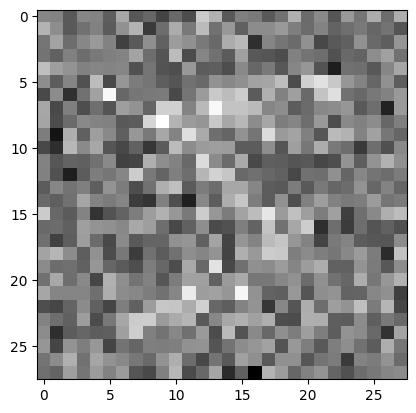

In [145]:
def forward(x0, t):
    noise = tf.random.normal(x0.shape)
    a_bar = alpha_cumprod[t]
    a_bar = tf.convert_to_tensor(a_bar)

    # we must add channel and batch dimension - channel is required in Conv2D layers
    a_bar = tf.reshape(a_bar, (1, 1, 1, 1))

    out = tf.sqrt(a_bar) * x0 + tf.sqrt(1 - a_bar) * noise

    return out

noisy_img = forward(X_train[0], 199)
print(noisy_img.shape)



plt.imshow(tf.squeeze(noisy_img[0]), cmap='gray')
plt.show()

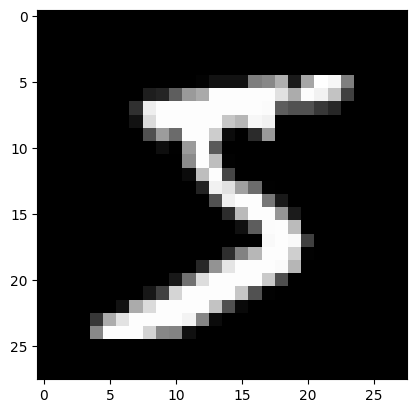

In [146]:
plt.imshow(X_train[0], cmap='gray')

In [147]:
imgs = []
for i in range(10):
    imgs.append(tf.squeeze(forward(X_train[0], i*20)))
imgs.append(tf.squeeze(forward(X_train[0], 199)))
imgs = np.array(imgs)

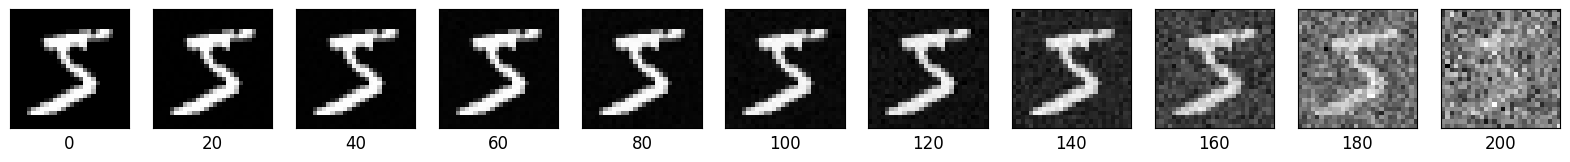

In [148]:
plt.figure(figsize=(20, 20))
for i in range(len(imgs)):
    plt.subplot(1, imgs.shape[0], i+1)
    plt.imshow(imgs[i], cmap='gray')
    plt.xticks([])  #hide
    plt.yticks([])  
    plt.xlabel(str(i*20), fontsize=12)

    
plt.show()